# Alto Neuroscience data challenge
#### Jared Scott, applicant
---

### Dataset:

The dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. The dataset itself and further description is found on kaggle.com at the following address: https://www.kaggle.com/osmi/mental-health-in-tech-survey

### Directives:
1. What questions can we address with this dataset?
2. How can we go about answering those questions?

---

### First steps:

First, we note the description of the survey dataset fields from the website:

* Timestamp of survey
* Age
* Gender
* Country
* state: If you live in the United States, which state or territory do you live in?
* self_employed: Are you self-employed?
* family_history: Do you have a family history of mental illness?
* treatment: Have you sought treatment for a mental health condition?
* work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
* no_employees: How many employees does your company or organization have?
* remote_work: Do you work remotely (outside of an office) at least 50% of the time?
* tech_company: Is your employer primarily a tech company/organization?
* benefits: Does your employer provide mental health benefits?
* care_options: Do you know the options for mental health care your employer provides?
* wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
* seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
* anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
* leave: How easy is it for you to take medical leave for a mental health condition?
* mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
* physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
* coworkers: Would you be willing to discuss a mental health issue with your coworkers?
* supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
* mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?
* physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?
* mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?
* obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
* comments: Any additional notes or comments

---

### Formulating dataset questions and possible strategies to address them:

With the above descriptions, we can start to pose some questions that the dataset could potentially address.

##### Questions to address and potential analysis strategies:
So given the breadth of survey variables, we can ask many questions of the data here, such as:

0. What are the general population-level trends of the data? 
    * We can use visualization and descriptive statistics to show these trends
    * This is a basic question that needs to be addressed before moving on to more interesting ones
####    
1. Can we identify predictors of mental illness in the workplace? More importantly, how is the tech industry supporting or not supporting mental health?
    * We can use logistic regression in concert with L2 regularization to identify features with higher odds-ratios. 
    * Comparing these odds ratios allows us to identify potentially predictive features of mental illness in the tech workplace.
    
##### We can also ask other questions that could be addressed in a future analysis:

2. Are there respondant subsets that represent marginalized groups who are less likely to be supported by their employers? Are there any concrete predictors of membership in such subsets?
#### 
3. Are there predictors of treatment-seeking behavior in respondants with mental illness? Does this vary by the severity of mental illness reported, as in the `workplace_interfere` variable?

##### Note:

Given time constraints, this analysis will focus on questions 0 and 1, but the analysis techniques described below could be extended to answer questions 2 and 3. For possible alternate analysis methodologies, please see the description at the bottom of this document. 

--- 

### Dataset loading and preprocessing:

Given the nature of the data acquired, we will be dealing primarily with logical and categorical responses. To start the analysis, we load the .csv file into python with the following:

In [160]:
# Turn off warnings - in production code, all relevant warnings would be addressed
import warnings
warnings.filterwarnings("ignore")

# load standard libraries that we'll be working with
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the survey data into dataframe
mhdf = pd.read_csv('./survey.csv')

Now that the data is loaded, we need to get a feel for what it contains:

In [2]:
print(mhdf.shape)
mhdf.head()

(1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


From the above, there are 1259 survey responses across 27 different data fields. Since there are too few `Comment` responses, let's remove the last column. The `Timestamp` variable is also not useful for our analysis, so we can remove it as well. 

There are also a lot of `NaNs` and response inconsistencies that need cleaning up. We can do some of that with the following code:

In [3]:
mhdf.drop('comments', axis=1, inplace=True)
mhdf.drop('Timestamp', axis=1, inplace=True)
mhdf.fillna(value='No response or N/A', inplace=True)
mhdf.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,No response or N/A,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,No response or N/A,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No response or N/A,No response or N/A,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No response or N/A,No response or N/A,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,No response or N/A,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


Now we need to see if there are any non-standard responses that need to be dealt with. We can do this by examining unique responses per column, as in the following:

In [4]:
# Loop through each column and print unique responses:
for column in mhdf.columns:
    print(mhdf[column].name + ':\n')
    print(mhdf[column].unique())
    print('\n')

Age:

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


Gender:

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leanin

Except for the `Age` and `Gender` columns, all other variables appear to be ok. Let's clean data in these two columns according to some rules: anyone reporting `Age` as less than 16 or greater than 100 (8 outliers in total) we will assign an age of 16 (which assumes every respondant is eligible to work in the US - this may be innaccurate but for our purposes here it will suffice). Regarding `Gender` responses, we acknowledge that the following rule disregards the wide variety of gender identity and expression in current society, but again for the simplicity of the analysis here we will apply a label of `OTHER` to any survey response that is not explicitly `MALE` or `FEMALE`.

The following code will apply these two rules:

In [5]:
# In future code I would certainly address the copy warnings generated by these lines:

mhdf['Age'][(mhdf['Age'] < 16) | (mhdf['Age'] > 100)] = 16

mhdf['Gender'] = mhdf['Gender'].str.upper()
mhdf['Gender'] = mhdf['Gender'].str.replace(' ','')

mhdf['Gender'][mhdf['Gender'] == 'M'] = 'MALE'
mhdf['Gender'][mhdf['Gender'] == 'F'] = 'FEMALE'

mhdf['Gender'][(mhdf['Gender'] != 'MALE') & (mhdf['Gender'] != 'FEMALE')] = 'OTHER'


Ignoring the warnings produced by the above, now these columns are more standardized:

In [6]:
mhdf['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 16, 43, 56, 60, 54, 55,
       48, 20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

In [7]:
mhdf['Gender'].unique()

array(['FEMALE', 'MALE', 'OTHER'], dtype=object)

With data loading and preprocessing complete, we can now start to address the questions put forth above.



---

### 0. What are the general sample population-level trends?

To address this, we can start with the following code:

In [8]:
# Look at descriptive statistics of age: (the only numeric variable)
mhdf['Age'].describe()

count    1259.000000
mean       31.974583
std         7.376605
min        16.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

Text(0.5, 0, 'Age (years)')

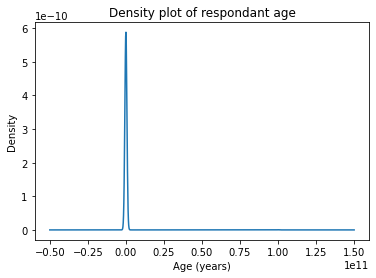

In [161]:
# Plot a kernel-smoothed density plot of age with standard parameters, i.e. standard bandwidth:

# Note that if we wanted to better understand the small peak in density at roughly 55-60 years of age 
#     we could decrease the bandwidth to increase visual resolution, but this also results 
#     in a noisier plot (overfitting)

mhdf.Age.plot.kde()
plt.title('Density plot of respondant age')
plt.xlabel('Age (years)')

From the summary statistics and kernel-smoothed density plot above, most respondants are about 30 years old, and the overall distribution is skewed toward younger respondants, leaving older indivduals in the minority.

As far as other catgorical variables are concerned, we can assess them with similar code, and look at the distribution of responses with horizontal bar plots as well:

In [162]:
# This function also describes all other categorical variables with a slight modification:
mhdf.describe(include=object)

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1259,1259,744,1241,1259,1259,995,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,49,48,45,2,2,2,4,6,2,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:31:41,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,615,751,138,1095,767,637,465,290,883,...,563,490,925,774,516,1008,557,576,1075,5


---

Now, we'd like to visualize the distribution of responses by important column variables:

Text(0.5, 0, 'Counts')

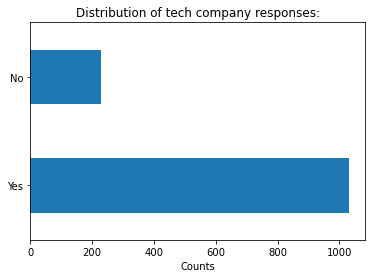

In [11]:
mhdf['tech_company'].value_counts().plot(kind='barh')
plt.title('Distribution of tech company responses:')
plt.xlabel('Counts')

Above: the vast majority of respondants work in the tech industry.
    
---

Text(0.5, 0, 'Counts')

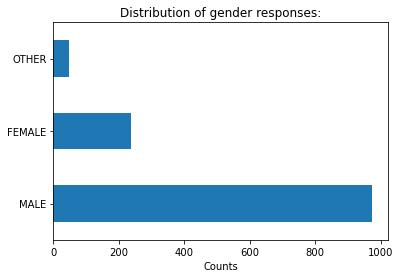

In [12]:
mhdf['Gender'].value_counts().plot(kind='barh')
plt.title('Distribution of gender responses:')
plt.xlabel('Counts')

From the above visualization, there are many more male respondants than female, which is somewhat expected for a survey about the tech industry.

---

Text(0.5, 0, 'Counts')

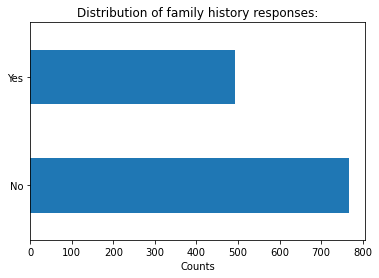

In [13]:
mhdf['family_history'].value_counts().plot(kind='barh')
plt.title('Distribution of family history responses:')
plt.xlabel('Counts')

Above: more than a third of respondants have a familial tie to mental illness.

---

Text(0.5, 0, 'Counts')

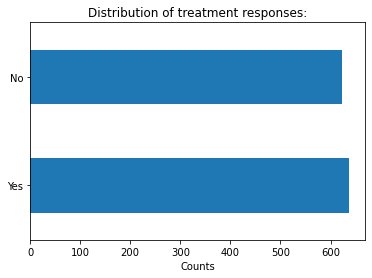

In [14]:
mhdf['treatment'].value_counts().plot(kind='barh')
plt.title('Distribution of treatment responses:')
plt.xlabel('Counts')

Above: there are roughly equal proportions of respondants that have sought out treatment for mental disorders versus those that have not. 

---

Text(0.5, 0, 'Counts')

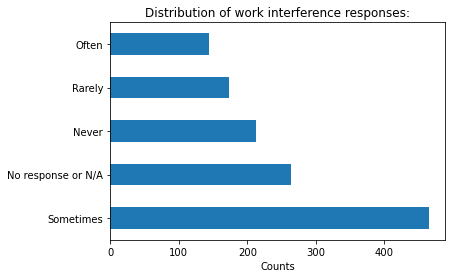

In [15]:
mhdf['work_interfere'].value_counts().plot(kind='barh')
plt.title('Distribution of work interference responses:')
plt.xlabel('Counts')

Above: the `work_interference` variable can be taken as a proxy indicator for the presence of mental illness in a given respondent. Using this proxy, we can see that only about 1/4 of all surveyed do not have some form of mental illness (i.e. `N/A` responses). After accumulating all other response types (`Often` + `Rarely` + `Never` + `Sometimes`) it is evident that roughly 75% of all surveyed have some form of mental illness, which seems quite high, or biased. Perhaps this could have arisen because those people taking the survey actively sought it out in some way - that is, they might have been browsing content about mental health to begin with. Surveys that are more representative of an entire population in the future would ideally be conducted in a more random fashion to avoid bias like this, but in a more advanced analysis of this survey data, class balancing techniques like random resampling (over- or under- applied to minority or majority classes) or SMOTE could be used to achieve better sample proportions for this variable.

--- 

### 1. Can we identify predictors of mental illness in the workplace? Are there predictors specific to the tech industry?

For this analysis I will focus on the second part of this question, as it is more relevant to purpose of the survey itself. I will also ignore geographic variability due to lack of time, but this would also be an interesting avenue to pursue in a future analysis.

**Methods to try:** We can use logistic regression to identify features with higher odds-ratio coefficients (after exponentiation), i.e. those columns variables that are better predictors of mental illness in the workplace.

**Encoding categorical data:** To use statistical analysis and machine-learning techniques with categorical data, it is first necessary to encode these responses with numerical values. Noted below in the comments, for many variables, the possible responses can be somewhat ambiguous to interpret, i.e. `'Don't know'` - in these cases perhaps the use of a Likert scale would have been more useful for application of machine learning techniques.

The following code creates a new data frame with this numerical encoding scheme:

In [145]:
# create copy of original data frame to manipulate
ndf = mhdf

# [ NOTES: ]

# For many variables, the possible responses can be somewhat ambiguous to interpret, 
#     e.g. 'Don't know' - perhaps the use of a balanced Likert scale for these cases would have 
#     been more useful for machine learning techniques

# The problem with the function I wrote below is that the order of the ordinal responses may not be 
#     standardized from column to column. Knowing that this is a standard data science operation,
#     I found a Python solution to encode the categorical variables according to a passed mapping.
#     I could have extended this mapping reference to the function I wrote, but time was a limitation.

# Another problem with ordinal categorical data that is not standardized across variables is that it can be harder
#     to interpret the coefficients because the notion of scale between variables is arbitrary. This is not 
#     an issue I will be able to ameliorate here with my time constraints. 

# --------

# Going through each column variable (except the numeric age column), 
#     we encode the categorical responses with numeric values:

from category_encoders.ordinal import OrdinalEncoder

# Create dictionary of column mapppings
catMappings = [{'col': 'Gender', 'mapping': {'OTHER': 1, 'MALE': 0, 'FEMALE': 2}}, \
                {'col': 'self_employed',  'mapping': {'No response or N/A': 1, 'No': 0, 'Yes': 2}}, \
                {'col': 'family_history', 'mapping': {'No': 1, 'Yes': 2}}, \
                {'col': 'treatment', 'mapping': {'No': 1, 'Yes': 2}}, \
                {'col': 'work_interfere', 'mapping': {'No response or N/A': 0, 'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4}}, \
                {'col': 'no_employees', 'mapping': {'1-5': 1, '6-25': 2, '26-100': 3, '100-500': 4, '500-1000': 5, 'More than 1000': 6}}, \
                {'col': 'remote_work', 'mapping': {'No': 1, 'Yes': 2}}, \
                {'col': 'tech_company', 'mapping': {'No': 1, 'Yes': 2}}, \
                {'col': 'benefits', 'mapping': {"Don't know": 1, 'No': 0, 'Yes': 2}}, \
                {'col': 'care_options', 'mapping': {'Not sure': 1, 'No': 0, 'Yes': 2}}, \
                {'col': 'wellness_program', 'mapping': {"Don't know": 1, 'No': 0, 'Yes': 2}}, \
                {'col': 'seek_help', 'mapping': {"Don't know": 1, 'No': 0, 'Yes': 2}}, \
                {'col': 'anonymity', 'mapping': {"Don't know": 1, 'No': 0, 'Yes': 2}}, \
                {'col': 'leave', 'mapping': {"Don't know": 2, 'Very easy': 0, 'Somewhat easy': 1, 'Somewhat difficult': 3, 'Very difficult': 4}}, \
                {'col': 'mental_health_consequence', 'mapping': {'No': 0, 'Maybe': 1, 'Yes': 2}}, \
                {'col': 'phys_health_consequence', 'mapping': {'No': 0, 'Maybe': 1, 'Yes': 2}}, \
                {'col': 'coworkers', 'mapping': {'No': 0, 'Some of them': 1, 'Yes': 2}}, \
                {'col': 'supervisor', 'mapping': {'No': 0, 'Some of them': 1, 'Yes': 2}}, \
                {'col': 'mental_health_interview', 'mapping': {'No': 0, 'Maybe': 1, 'Yes': 2}}, \
                {'col': 'phys_health_interview', 'mapping': {'No': 0, 'Maybe': 1, 'Yes': 2}}, \
                {'col': 'mental_vs_physical', 'mapping': {"Don't know": 1, 'No': 0, 'Yes': 2}}, \
                {'col': 'obs_consequence', 'mapping': {'No': 1, 'Yes': 2}}]

ncdr = OrdinalEncoder(mapping=catMappings)
ndf = ncdr.fit_transform(ndf.drop(['Age'], axis=1),)

# # define a function to read unique responses per column and reassign numeric values accordingly
# def encode_responses(df):
#    for column in df.columns:
#        resps = df[column].unique()
#        num = 0
#        for r in resps:
#            df[column][df[column] == r] = num
#            num += 1
#    return df
            
# ndf = encode_responses(ndf)


Now we can see that the new data frame has been encoded with the ordinal scheme supplied above:

In [146]:
ndf.head(3)

,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2,United States,IL,1,1,2,4,2,1,2,...,2,1,0,0,1,2,0,1,2,1
1,0,United States,IN,1,1,1,2,6,1,1,...,1,2,1,0,0,0,0,0,1,1
2,0,Canada,No response or N/A,1,1,1,2,2,1,2,...,1,3,0,0,2,2,2,2,0,1


Now we need to create our binary outcome variable. To look at predictors of mental illness in the tech industry specifically, we first need to select only tech workers. We then can create this logical (boolean) outcome variable by selecting rows with `work_interfere > 0`:

In [158]:
# Filter out non-tech workers with the following:
tdf = ndf[ndf['tech_company'] == 2]

# Make binary outcome variable - those with mental illness reported work_interfere > 0:
techOutcome = (tdf['work_interfere'] > 0) 

# Assess balance of classes now:
techOutcome.value_counts()

True     815
False    216
Name: work_interfere, dtype: int64

Again, the above shows that our positive class (tech workers with assumed mental illness) is out of balance with and proportionately larger to the negative class. This type of imbalance could be addressed in future analyses by some of the techniques previously mentioned above. 

So now we're ready to run logistic regression with our encoded features:

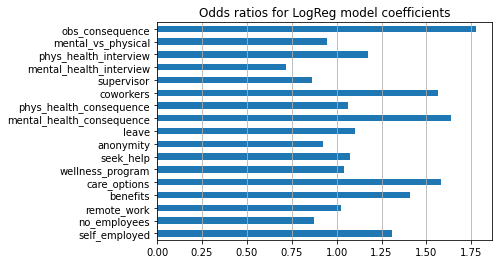

In [157]:
from sklearn.linear_model import LogisticRegression

# Drop the country and state variables from our feature observations, (no geographic analysis at present)
# as well as any that are non-ordinal (i.e. gender) or those that could be highly correlated with our outcome group:

X = tdf.drop(['Gender','Country','state','treatment','work_interfere','family_history','tech_company'],axis=1)
y = techOutcome

# Note that in the future I would optimize selection of this penalty hyperparameter with a grid search procedure
lrmodel = LogisticRegression(C=1) # default C
# Above: C penalty decreasing toward zero = more regularization, 
# C increasing to infinity = less regularization

# Fit the LR model to our features (X) and outcomes (y)
lrmodel.fit(X, y)

# Get the resulting coefficients and exponentiate them for interpretation
ors = pd.Series(np.exp(lrmodel.coef_[0]))

# Plot odds ratios:
ax = ors.plot(kind='barh', title='Odds ratios for LogReg model coefficients')
ax.set_yticklabels(X.columns)
ax.xaxis.grid(True)

### Interpretation:

From the above plot of odds ratios for the logreg coefficients, we can see that there are several features that make for reasonable predictors of mental illness or health in tech workers. While there are many variables to interpret, here are some of the more important relationships: 

*(also note: for odds ratios greater than 1, every unit increase in a given feature is associated with increased probability of an outcome, while for odds ratios less than 1, such an increase is associated with lower outcome probabilities)*

* In general, these results show that tech workers who report an increased perceived ability to communicate openly with an employer about mental health issues in general are at lower risk of having mental illness (O.R.: `mental_health_interview < 0.75`, `supervisor < 0.80`, `anonymity approx. = 0.90`).
* It also appears that working for a larger company results in slightly decreased probability of mental illness (O.R.: `no_employees approx = 0.80`). An explanation for this finding could be that larger companies have better HR departments, more established protocols for dealing with mental illness in an appropriate manner, or may have wellness programs or better health insurance policies.
* Increased probability of mental illness could be associated with perceived negative consequences of sharing mental health information, or having actually observed adverse consequences for the sharing of mental health information with employers or even surprisingly with fellow colleagues: O.R.: `obs_consequence approx. = 1.75`, `mental_health_consequence approx. = 1.60`, `coworkers > 1.50`.

### Further analysis:

This type of analysis could also be further extended with other machine learning classification models like `Random Forest` methods, or multiclass `SVM` methods for analyzing these trends in the context of mental illness severity, or ensemble methods. 

Such methods could also be used to address questions 2 and 3 as stated in the beginning of this document. 